# HW 8

This assignment covers Comparision of Decision Trees and Support Vector Machine. 
**DO NOT ERASE MARKDOWN CELLS AND INSTRUCTIONS IN YOUR HW submission**

  * **Q** - QUESTION
  * **A** - Where to input your answer

## Instructions

Keep the following in mind for all notebooks you develop:
* Structure your notebook. 
* Use headings with meaningful levels in Markdown cells, and explain the questions each piece of code is to answer or the reason it is there.
* Make sure your notebook can always be rerun from top to bottom.
* Please start working on this assignment as soon as possible. If you are a beginner in Python this might take a long time. One of the objectives of this assignment is to help you learn python and scikit-learn package. 
* See [README.md](README.md) for homework submission instructions

## Related Tutorials
    
* [Decision Tree with KFold Cross Validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

* [Decision Tree with Bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html#sklearn.ensemble.BaggingRegressor)

* [Support Vector Machine](https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47)


# Data Processing

**Data** 
* Get the exploratory data from the git HW folder named ``HW8_data``.

* If you are using command line, the command is:  
```
>> wget https://git.txstate.edu/ML/2021Fall/blob/master/HW/HW8_data.csv
``` 

* wget instructions: 
  * dowload it from [link](https://eternallybored.org/misc/wget/) 
  * follow [steps](https://stackoverflow.com/questions/29113456/wget-not-recognized-as-internal-or-external-command)

**Q1** Get training data from the dataframe
1. Load HW8_data.csv into data frame
2. Check if there is any NaN in the dataset
3. Clean the dataset 
4. Assign values of ```target_class``` column to ```y```, note you have to use ```.values``` method
5. Drop ```target_class``` column from data frame,
6. Assign df values to x
7. Split dataset into train and test data use train_test_split with test_size = 0.2, stratify y and random_state = 1238

**A1** Replace ??? with code in the code cell below

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#Read the data file using the prropriate separator as input to read_csv()

df = pd.read_csv("HW8_data.csv")
df.head(5)
# check if there is NaN in the dataset
df.fillna(df.mean(), inplace=True)
#Drop NaNs if there is any
df.dropna()

# Count & Print number of entries for different class_target
print(df.head())

    Mean of the integrated profile  \
0                       121.156250   
1                        76.968750   
2                       130.585938   
3                       156.398438   
4                        84.804688   

    Standard deviation of the integrated profile  \
0                                      48.372971   
1                                      36.175557   
2                                      53.229534   
3                                      48.865942   
4                                      36.117659   

    Excess kurtosis of the integrated profile  \
0                                    0.375485   
1                                    0.712898   
2                                    0.133408   
3                                   -0.215989   
4                                    0.825013   

    Skewness of the integrated profile   Mean of the DM-SNR curve  \
0                            -0.013165                   3.168896   
1                        

In [2]:
# Assign values of ```target_class``` column to y, note you have to use .values method
y = df.target_class.values
# Drop 'target_class' column from data frame,
df.drop(columns=['target_class'], inplace=True)
# Assign df values to x
x = df.values
# View shape of x and y
print(x.shape)
print(y.shape)

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state=1238, stratify=y)

(12528, 8)
(12528,)


# Decision Tree

## Decision Tree with different depth

**Q2** Train DecisionTreeClassifier Model at different depths 
1. Create four [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) models with different parameters
   * use ```max_depth``` size = 1, 2, 5, 25 & ```max_leaf_nodes```=5, 10, 15, 25 respectively
   * use ```random_state=30``` & ```criterion='entropy'``` for all models
2. Fit the model with the train data. You will have 4 different models for different depth sizes.
3. Predict the values with the test data 
   * Calculate the mean squared error of each model's prediction
   * Print precision recall curve for the model with the best MSE value

**A2** Replace ??? with code in the code cell below

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error

# create decision tree classifier 
# criterion='entropy'
clf_1 = DecisionTreeClassifier(criterion='entropy', max_depth = 1, max_leaf_nodes = 5, random_state=30)
clf_2 = DecisionTreeClassifier(criterion='entropy', max_depth = 2, max_leaf_nodes = 10, random_state=30)
clf_3 = DecisionTreeClassifier(criterion='entropy', max_depth = 5, max_leaf_nodes = 15, random_state=30)
clf_4 = DecisionTreeClassifier(criterion='entropy', max_depth = 25, max_leaf_nodes = 25, random_state=30)

# fit regression model on train set
clf_1.fit(xtrain, ytrain)
clf_2.fit(xtrain, ytrain)
clf_3.fit(xtrain, ytrain)
clf_4.fit(xtrain, ytrain)

#predict on test set
y_1 = clf_1.predict(xtest)
y_2 = clf_2.predict(xtest)
y_3 = clf_3.predict(xtest)
y_4 = clf_4.predict(xtest)

#calculate mean_squared_error
print(mean_squared_error(ytest, y_1))
print(mean_squared_error(ytest, y_2))
print(mean_squared_error(ytest, y_3))
print(mean_squared_error(ytest, y_4))

0.03391859537110934
0.03391859537110934
0.023942537909018357
0.02274541101356744


### Precision-Recall Curve for Best Model 

``Important Note:`` If ``from_estimator()`` function gives Attribute error then it means your sklearn is not updated.

* If you are using conda, you can upgrade with

conda upgrade -c conda-forge scikit-learn

* or, with pip,

python -m pip install scikit-learn --upgrade


In [4]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

PrecisionRecallDisplay.from_estimator(precision_recall_curve(ytest, y_4))
plt.show()

AttributeError: type object 'PrecisionRecallDisplay' has no attribute 'from_estimator'

### Decision Tree with K-fold cross validation

**Q3** Use Kfold on the testing dataset, and evaluate the best model
1. Finally pick the best max_depth you got
2. Use this max_depth & max_leaf_node. Also, use cross_val_score and fit your model with k = 5 fold size
3. Calculate average scores in kfold

**A3** Replace ??? with code in the code cell below

In [20]:
from sklearn.model_selection import KFold, cross_val_score

scores = cross_val_score(clf_4, x, y, cv = 5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(np.mean(scores)))

Cross-validation scores: [0.97805267 0.97765363 0.97565842 0.97884232 0.97764471]
Average cross-validation score: 0.98


###  Decision Tree with Bagging 

**Q4** Now we will use Bagging technique on the our previous best model, and evaluate it
1. Now, Create a Bagged Model passing ```model = previous_best, n_estimators = 20 & random_state=1 to BaggingClassifier()```
2. Fit the model with the train data
3. Predict the values with the test data
4. Calculate the test MSE 
5. Plot Precision-Recall Curve from the true & predicted test data

**A4** Replace ??? with code in the code cell below

In [21]:
from sklearn.ensemble import BaggingClassifier

# Use BaggingRegressor to fit the training data
# Calculate the mean squared error 

#load BaggingRegressor model and pass n_estimators=20, random_state=1
bagged_clf = BaggingClassifier(base_estimator = clf_4, n_estimators = 20, random_state = 1)
bagged_clf.fit(xtrain, ytrain)
pred = bagged_clf.predict(xtest)
mean_squared_error(ytest, pred)

0.023942537909018357

In [22]:
#pass necessary parameters to PrecisionRecallDisplay.from_estimator() 

PrecisionRecallDisplay.from_estimator(precision_recall_curve(ytest, pred))
plt.show()

AttributeError: type object 'PrecisionRecallDisplay' has no attribute 'from_estimator'

# Support Vector Machine(SVM)

**Q5** Create SVM Model on the training set, and evaluate

1. Now, Create a SVM Model with default parameters
2. Fit the model with the train data
3. Predict the values with the test data
4. Calculate the test MSE 
5. Plot confusion matrix on the test data


**A5** Replace ??? with code in the code cell below

In [23]:
# import SVC classifier
from sklearn.svm import SVC
# import metrics to compute accuracy
from sklearn.metrics import accuracy_score

svc= SVC()

# fit classifier to training set
svc.fit(xtrain, ytrain)


# make predictions on test set
y_pred=svc.predict(xtest)

# Calculate MSE

print('Model MSE: {0:0.4f}'.format(mean_squared_error(ytest, y_pred)))

# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(ytest, y_pred)))

Model MSE: 0.0307
Model accuracy score with default hyperparameters: 0.9693


<Figure size 432x288 with 0 Axes>

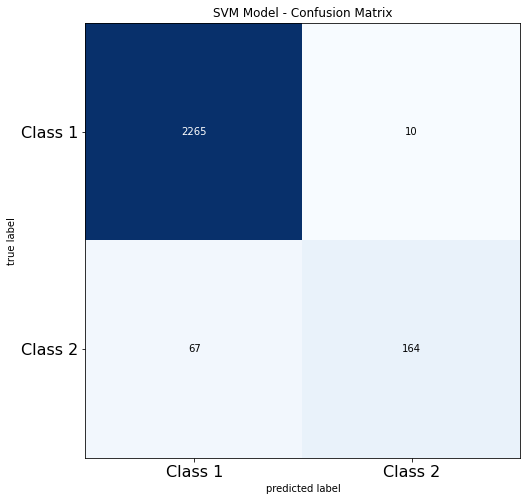

In [24]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as pl

cm = confusion_matrix(ytest, y_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("SVM Model - Confusion Matrix")
plt.xticks(range(2), ["Class 1","Class 2"], fontsize=16)
plt.yticks(range(2), ["Class 1","Class 2"], fontsize=16)
plt.show()

## SVM with high margin

**Q6** Create SVM Model on the training set, and evaluate

``Note:``
1. If we analyze our dataset using df.describe() function, we will see that there are many outliers in the dataset.
2. So, we need to increase our margin with ```HIGH C``` values so that the SVM model get better generalization

``Task:``

1. Now, Create a SVM Model with rbf kernel and C=100
2. Fit the model with the train data
3. Predict the values with the test data
4. Calculate the test MSE 
5. Plot Confusion Matrix from the true & predicted test data


**A6** Replace ??? with code in the code cell below


In [25]:
# instantiate classifier with rbf kernel and C=100
svc= SVC(kernel='rbf', C = 100)


# fit classifier to training set
svc.fit(xtrain, ytrain)


# make predictions on test set
y_pred_high=svc.predict(xtest)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(ytest, y_pred_high)))

Model accuracy score with rbf kernel and C=100.0 : 0.9749


<Figure size 432x288 with 0 Axes>

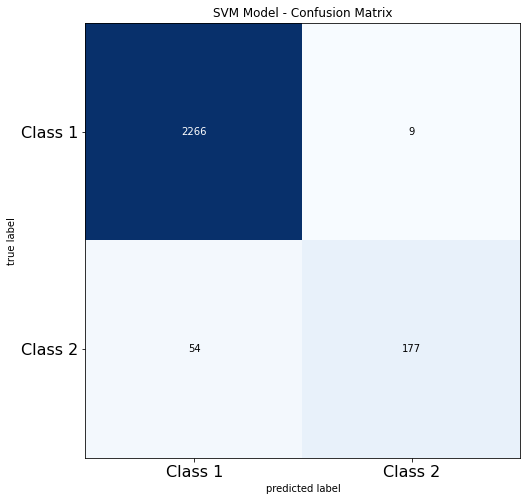

In [26]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as pl

cm = confusion_matrix(ytest, y_pred_high)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("SVM Model - Confusion Matrix")
plt.xticks(range(2), ["Class 1","Class 2"], fontsize=16)
plt.yticks(range(2), ["Class 1","Class 2"], fontsize=16)
plt.show()

## SVM with linear kernel

**Q7** Create SVM Model on the training set, and evaluate

``Task:``

1. Now, Create a SVM Model with linear kernel and C=1.0
2. Fit the model with the train data
3. Predict the values with the test data
4. Calculate the test MSE 
5. Plot Confusion Matrix from the true & predicted test data


**A7** Replace ??? with code in the code cell below


In [ ]:
# instantiate classifier with linear kernel and C=1.0
linear_svc= SVC(kernel='linear', C = 1.0)


# fit classifier to training set
linear_svc.fit(xtrain, ytrain)


# make predictions on test set
y_pred_test=linear_svc.predict(xtest)

# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(ytest, y_pred_test)))

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as pl

cm = confusion_matrix(ytest, y_pred_test)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("SVM Model - Confusion Matrix")
plt.xticks(range(2), ["Class 1","Class 2"], fontsize=16)
plt.yticks(range(2), ["Class 1","Class 2"], fontsize=16)
plt.show()